In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import PIL.Image
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
import zipfile
import shutil
from platform import python_version
import cv2
from google.colab import drive
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import pylab
from keras.datasets import mnist
from google.colab.patches import cv2_imshow
import csv

In [2]:

def zip_list(file_path):
    zf = zipfile.ZipFile(file_path, 'r')
    zf.extractall()



file_path = '/content/drive/MyDrive/CIFAR10.zip'
zip_list(file_path)

In [14]:
A ='/content/CIFAR10/train/airplane'
B ='/content/CIFAR10/train/automobile'
C ='/content/CIFAR10/train/bird'
D ='/content/CIFAR10/train/cat'
E ='/content/CIFAR10/train/deer'
F ='/content/CIFAR10/train/dog'
G ='/content/CIFAR10/train/frog'
H ='/content/CIFAR10/train/horse'
I ='/content/CIFAR10/train/ship'
J ='/content/CIFAR10/train/truck'

filenames_A = os.listdir(A)
filenames_B = os.listdir(B)
filenames_C = os.listdir(C)
filenames_D = os.listdir(D)
filenames_E = os.listdir(E)
filenames_F = os.listdir(F)
filenames_G = os.listdir(G)
filenames_H = os.listdir(H)
filenames_I = os.listdir(I)
filenames_J = os.listdir(J)

A = pd.DataFrame({'picture_name':filenames_A})
A['label'] = '0'
A['path'] = 'airplane/'+A['picture_name']

B = pd.DataFrame({'picture_name':filenames_B})
B['label'] = '1' 
B['path'] = 'automobile/'+B['picture_name']

C = pd.DataFrame({'picture_name':filenames_C})
C['label'] = '2'
C['path'] = 'bird/'+C['picture_name']

D = pd.DataFrame({'picture_name':filenames_D})
D['label'] = '3'
D['path'] = 'cat/'+D['picture_name']

E = pd.DataFrame({'picture_name':filenames_E})
E['label'] = '4'
E['path'] = 'deer/'+E['picture_name']

F = pd.DataFrame({'picture_name':filenames_F})
F['label'] = '5' 
F['path'] = 'dog/'+F['picture_name']

G = pd.DataFrame({'picture_name':filenames_G})
G['label'] = '6'
G['path'] = 'frog/'+G['picture_name']

H = pd.DataFrame({'picture_name':filenames_H})
H['label'] = '7'
H['path'] = 'horse/'+H['picture_name']

I = pd.DataFrame({'picture_name':filenames_I})
I['label'] = '8'
I['path'] = 'ship/'+I['picture_name']

J = pd.DataFrame({'picture_name':filenames_J})
J['label'] = '9'
J['path'] = 'truck/'+J['picture_name']

alldata = pd.concat([A,B,C,D,E,F,G,H,I,J])

alldata

,picture_name,label,path
0,biplane_s_001054.png,0,airplane/biplane_s_001054.png
1,reconnaissance_plane_s_000006.png,0,airplane/reconnaissance_plane_s_000006.png
2,stealth_bomber_s_001405.png,0,airplane/stealth_bomber_s_001405.png
3,biplane_s_002152.png,0,airplane/biplane_s_002152.png
4,twinjet_s_001531.png,0,airplane/twinjet_s_001531.png
...,...,...,...
4995,tipper_s_001912.png,9,truck/tipper_s_001912.png
4996,tipper_truck_s_000008.png,9,truck/tipper_truck_s_000008.png
4997,tip_truck_s_000896.png,9,truck/tip_truck_s_000896.png
4998,lorry_s_001856.png,9,truck/lorry_s_001856.png


                picture_name label                                 path
0     bufo_bufo_s_001378.png     6         /frog/bufo_bufo_s_001378.png
1       pontoon_s_000292.png     8           /ship/pontoon_s_000292.png
2       maltese_s_000746.png     5            /dog/maltese_s_000746.png
3          deer_s_000135.png     4              /deer/deer_s_000135.png
4      stallion_s_001695.png     7         /horse/stallion_s_001695.png
..                       ...   ...                                  ...
95   pilot_boat_s_001012.png     8        /ship/pilot_boat_s_001012.png
96    powerboat_s_000829.png     8         /ship/powerboat_s_000829.png
97  felis_catus_s_001304.png     3        /cat/felis_catus_s_001304.png
98   automobile_s_001438.png     1  /automobile/automobile_s_001438.png
99         lark_s_000407.png     2              /bird/lark_s_000407.png

[100 rows x 3 columns]


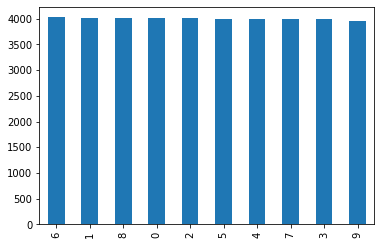

In [15]:
"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

train_df,test_df = train_test_split(alldata,test_size=0.2,random_state=40)

train_df = train_df.reset_index(drop=True)
example_df = train_df[:100].reset_index(drop=True)
print(example_df)
train_df['label'].value_counts().plot.bar()
"""

In [27]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  

from tensorflow.keras.optimizers import *


batch_size = 100


train_datagen = ImageDataGenerator(
    rotation_range=0,          #隨機轉換角度次數
    rescale=1./255,             #正規化
    shear_range=0,            #斜拉
    zoom_range=0,             #放大縮小
    horizontal_flip=False,       #隨機翻轉
    width_shift_range=0,      #左右移動
    height_shift_range=0,     #上下移動
    validation_split=0.15
    )    

train_generator = train_datagen.flow_from_dataframe(
    alldata,'/content/CIFAR10/train',x_col ='path',y_col = 'label',target_size = (32,32),class_mode = 'categorical',
    batch_size = batch_size,
    #subset = 'training'
    )

"""
validation_generator = train_datagen.flow_from_dataframe(
    alldata,
    '/content/CIFAR10/train',
    x_col ='path',
    y_col = 'label',
    target_size = (32,32),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation'
)


example_generator = train_datagen.flow_from_dataframe(
    example_df,
    '/content/CIFAR10/train',
    x_col ='path',
    y_col = 'label',
    target_size = (100,100),
    class_mode = 'categorical',
)
"""

Found 50000 validated image filenames belonging to 10 classes.


"\nvalidation_generator = train_datagen.flow_from_dataframe(\n    alldata,\n    '/content/CIFAR10/train',\n    x_col ='path',\n    y_col = 'label',\n    target_size = (32,32),\n    class_mode = 'categorical',\n    batch_size = batch_size,\n    subset = 'validation'\n)\n\n\nexample_generator = train_datagen.flow_from_dataframe(\n    example_df,\n    '/content/CIFAR10/train',\n    x_col ='path',\n    y_col = 'label',\n    target_size = (100,100),\n    class_mode = 'categorical',\n)\n"

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution (Conv2D)         (None, 30, 30, 32)        896       
_________________________________________________________________
Convolution1 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
Pooling (MaxPooling2D)       (None, 14, 14, 32)        0         
_________________________________________________________________
Convolution2 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
Convolution3 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
Pooling2 (MaxPooling2D)      (None, 5, 5, 64)          0         
_________________________________________________________________
Convolution6 (Conv2D)        (None, 3, 3, 128)         73

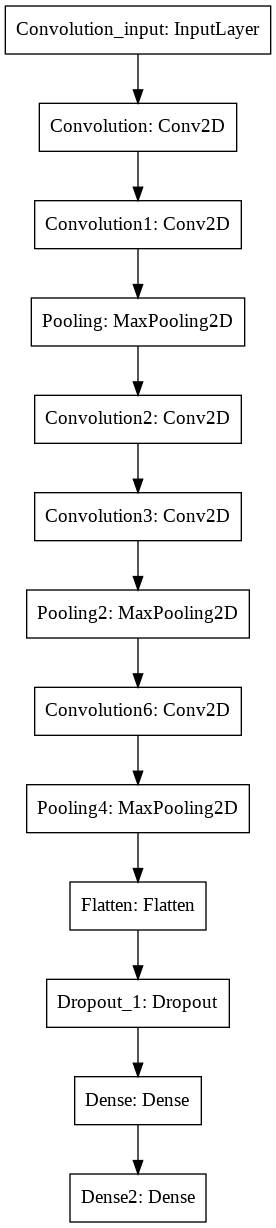

In [88]:
from keras import models
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import plot_model



'''
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8
'''
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 32, activation = 'relu',kernel_size = (3,3),input_shape = (32,32,3), name = 'Convolution' ) )
CNN.add( Conv2D( 32, activation = 'relu',kernel_size = (3,3),name = 'Convolution1' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Conv2D( 64, activation = 'relu',kernel_size = (3,3),name = 'Convolution2' ) )
CNN.add( Conv2D( 64, activation = 'relu',kernel_size = (3,3),name = 'Convolution3' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling2' ) )
CNN.add( Conv2D( 128, activation = 'relu',kernel_size = (3,3),name = 'Convolution6' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling4' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense(256, activation = 'relu', name = 'Dense' ) )
CNN.add( Dense( 10, activation = 'softmax', name = 'Dense2' ) )
CNN.compile( optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'] )

CNN.summary()






CNN.save("CIFAR10_mod")
plot_model(CNN, to_file='model.png')

In [ ]:
epochs = 20
CNN.fit(
    train_generator,
    batch_size = 50,
    epochs = epochs,
    #validation_data = validation_generator,
    #steps_per_epoch = 100,
    #validation_steps = validation_generator.samples // batch_size,
    )

Epoch 1/20
500/500 [==============================] - 15s 28ms/step - loss: 2.0065 - accuracy: 0.2306
Epoch 2/20
500/500 [==============================] - 14s 28ms/step - loss: 1.4589 - accuracy: 0.4659
Epoch 3/20
500/500 [==============================] - 14s 27ms/step - loss: 1.2706 - accuracy: 0.5415
Epoch 4/20
500/500 [==============================] - 14s 28ms/step - loss: 1.1366 - accuracy: 0.5933
Epoch 5/20
159/500 [========>.....................] - ETA: 9s - loss: 1.0494 - accuracy: 0.6304

In [76]:
A ='/content/CIFAR10/test/airplane'
B ='/content/CIFAR10/test/automobile'
C ='/content/CIFAR10/test/bird'
D ='/content/CIFAR10/test/cat'
E ='/content/CIFAR10/test/deer'
F ='/content/CIFAR10/test/dog'
G ='/content/CIFAR10/test/frog'
H ='/content/CIFAR10/test/horse'
I ='/content/CIFAR10/test/ship'
J ='/content/CIFAR10/test/truck'

test_A = os.listdir(A)
test_B = os.listdir(B)
test_C = os.listdir(C)
test_D = os.listdir(D)
test_E = os.listdir(E)
test_F = os.listdir(F)
test_G = os.listdir(G)
test_H = os.listdir(H)
test_I = os.listdir(I)
test_J = os.listdir(J)

A = pd.DataFrame({'picture_name':test_A})
A['label'] = 0
A['path'] = 'airplane/'+A['picture_name']

B = pd.DataFrame({'picture_name':test_B})
B['label'] = 1
B['path'] = 'automobile/'+B['picture_name']

C = pd.DataFrame({'picture_name':test_C})
C['label'] = 2
C['path'] = 'bird/'+C['picture_name']

D = pd.DataFrame({'picture_name':test_D})
D['label'] = 3
D['path'] = 'cat/'+D['picture_name']

E = pd.DataFrame({'picture_name':test_E})
E['label'] = 4
E['path'] = 'deer/'+E['picture_name']

F = pd.DataFrame({'picture_name':test_F})
F['label'] = 5
F['path'] = 'dog/'+F['picture_name']

G = pd.DataFrame({'picture_name':test_G})
G['label'] = 6
G['path'] = 'frog/'+G['picture_name']

H = pd.DataFrame({'picture_name':test_H})
H['label'] = 7
H['path'] = 'horse/'+H['picture_name']

I = pd.DataFrame({'picture_name':test_I})
I['label'] = 8
I['path'] = 'ship/'+I['picture_name']

J = pd.DataFrame({'picture_name':test_J})
J['label'] = 9
J['path'] = 'truck/'+J['picture_name']

testdata = pd.concat([A,B,C,D,E,F,G,H,I,J])

testdata

,picture_name,label,path
0,stealth_fighter_s_000974.png,0,airplane/stealth_fighter_s_000974.png
1,multiengine_airplane_s_000050.png,0,airplane/multiengine_airplane_s_000050.png
2,jetliner_s_001435.png,0,airplane/jetliner_s_001435.png
3,fighter_aircraft_s_001062.png,0,airplane/fighter_aircraft_s_001062.png
4,fighter_aircraft_s_000238.png,0,airplane/fighter_aircraft_s_000238.png
...,...,...,...
995,garbage_truck_s_001400.png,9,truck/garbage_truck_s_001400.png
996,trucking_rig_s_000691.png,9,truck/trucking_rig_s_000691.png
997,tipper_truck_s_000765.png,9,truck/tipper_truck_s_000765.png
998,camion_s_000421.png,9,truck/camion_s_000421.png


In [83]:


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_dataframe(
    testdata,
    '/content/CIFAR10/test',
    x_col ='path',
    y_col = None,
    target_size = (32,32),
    class_mode = None,
    batch_size = 1,
    shuffle=False
    )


test_predict = CNN.predict(test_generator)
testdata['predict'] = np.argmax(test_predict, axis = 1).astype('str')
testdata

Found 10000 validated image filenames.


,picture_name,label,path,predict
0,stealth_fighter_s_000974.png,0,airplane/stealth_fighter_s_000974.png,0
1,multiengine_airplane_s_000050.png,0,airplane/multiengine_airplane_s_000050.png,0
2,jetliner_s_001435.png,0,airplane/jetliner_s_001435.png,0
3,fighter_aircraft_s_001062.png,0,airplane/fighter_aircraft_s_001062.png,0
4,fighter_aircraft_s_000238.png,0,airplane/fighter_aircraft_s_000238.png,0
...,...,...,...,...
995,garbage_truck_s_001400.png,9,truck/garbage_truck_s_001400.png,7
996,trucking_rig_s_000691.png,9,truck/trucking_rig_s_000691.png,9
997,tipper_truck_s_000765.png,9,truck/tipper_truck_s_000765.png,9
998,camion_s_000421.png,9,truck/camion_s_000421.png,9


In [87]:
from sklearn import metrics 




test_predict = np.argmax(test_predict, axis = 1)
print(test_predict)
test_target = testdata['label']

print(metrics.confusion_matrix(test_target, test_predict, labels=[0,1,2,3,4,5,6,7,8,9])) 
print(metrics.classification_report(test_target, test_predict)) 

[0 0 0 ... 9 9 9]
[[812  20  38  21  21   3   4  12  24  45]
 [ 18 874   5   7   5   6   3   5   7  70]
 [ 53   6 661  60  69  66  50  25   4   6]
 [ 17  10  67 595  56 163  41  34   2  15]
 [ 10   6  57  56 716  38  34  79   2   2]
 [  6   1  44 131  33 698  13  64   0  10]
 [  5   2  54  54  51  24 785  17   1   7]
 [ 13   0  23  47  29  52   7 813   0  16]
 [113  49  11  19  13   3   4   7 696  85]
 [ 25  49  12  10   6   6   7  18   9 858]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.86      0.87      0.87      1000
           2       0.68      0.66      0.67      1000
           3       0.59      0.59      0.59      1000
           4       0.72      0.72      0.72      1000
           5       0.66      0.70      0.68      1000
           6       0.83      0.79      0.81      1000
           7       0.76      0.81      0.78      1000
           8       0.93      0.70      0.80      1000
          